In [2]:
# Function definition per assignment requirements
def train_model(X, y, alpha, max_epoch):
  """ Pass four arguments
  Arguments:
  X: input features
  y: responses
  alpha: learning rate
  max_epoch: maximum epochs
  Returns:
  w: estimated weights
  hist_loss: training loss history
  """
  m = X.shape[0]  # number of samples
  ones =np.ones((m,1))  
  X = np.concatenate((ones, X), axis=1)   # New X with X0's =1
  n = X.shape[1]   # number of column
  w = np.ones(n)    # parameter initialization
  h = np.dot(X, w)   # Compute hypothesis

  # Gradient descent algorithm
  hist_loss = np.ones(max_epoch)
  for i in range (0, max_epoch):
    w[0] = w[0] - (alpha / X.shape[0]) * sum(h-y) # compute slopes for theta 0
    for j in range(1, n):
      w[j]= w[j] - (alpha/ X.shape[0]) * sum((h-y) * X[:, j]) # compute slopes till theta j
    h  = np.dot(X, w)
    hist_loss[i] = loss_fn(y, h)  # Compute Cost
    print("Loss for Epoch (" + str(i) + "): " + str(hist_loss[i]))
  return w, hist_loss

def prediction(w, X):
  """ Pass two arguments
  Arguments:
  w: weights
  X: input features
  Returns:
  yhat: predicted values
  """
  m = X.shape[0]  # number of samples
  ones =np.ones((m,1))  
  X = np.concatenate((ones, X), axis=1)   # New X with X0's =1
  n = X.shape[1]   # number of column
  yhat = np.dot(X, w)
  return yhat


def loss_fn(y, yhat):
  """ Pass two arguments
  Arguments:
  y: responses
  yhat: predicted value
  Returns:
  loss: loss value
  """
  m = y.shape[0]
  loss = 1/(2*m) * sum(np.square(yhat-y))
  return loss

In [3]:
#import important library
import numpy as np
import pandas as pd

import io #Importing input module

from sklearn.model_selection import train_test_split
from sklearn import linear_model  # Importing linear model

import matplotlib.pyplot as plt

In [4]:
#import dataset
import pandas as pd

data = pd.read_csv(r'C:\Users\60172\Downloads\assignment1_dataset.csv')
data

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
...,...,...,...,...,...,...
995,-0.310133,0.529274,-1.439255,0.724974,0.430063,35.181828
996,-0.731895,-0.223302,-1.228191,-2.034934,0.509077,-70.134876
997,0.343181,0.431241,-0.054715,0.945423,-2.474684,42.925478
998,0.391021,0.494147,0.106403,-0.652278,-0.200139,-13.287862


In [5]:
#Split dataset (ratio of 8:2)
X_train, X_test, y_train, y_test = train_test_split(data[['f1','f2','f3','f4', 'f5']], data.iloc[:,-1], train_size=800, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 5)
(800,)
(200, 5)
(200,)


In [6]:
#Transform dataset into array
#For easier manipulation
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [7]:
# Train model
# Calculating weigh and loss history
epoch = 100
alpha = 0.1
weigh, cost = train_model(X_train, y_train, alpha, epoch)
print("\nEstimated weighs: ")
print(weigh)

Loss for Epoch (0): 649.5836040067343
Loss for Epoch (1): 518.8754107832559
Loss for Epoch (2): 415.0899985203067
Loss for Epoch (3): 332.6602304417268
Loss for Epoch (4): 267.17439932615366
Loss for Epoch (5): 215.13559413076874
Loss for Epoch (6): 173.77134354046174
Loss for Epoch (7): 140.88300029468084
Loss for Epoch (8): 114.72654424214915
Loss for Epoch (9): 93.91822970757272
Loss for Epoch (10): 77.35988242850405
Loss for Epoch (11): 64.17974069291017
Loss for Epoch (12): 53.68559561134278
Loss for Epoch (13): 45.32766497991632
Loss for Epoch (14): 38.669172017179456
Loss for Epoch (15): 33.363024432620705
Loss for Epoch (16): 29.13332450974319
Loss for Epoch (17): 25.760705865747692
Loss for Epoch (18): 23.07070204365534
Loss for Epoch (19): 20.924517752388958
Loss for Epoch (20): 19.211704594129078
Loss for Epoch (21): 17.84434676908717
Loss for Epoch (22): 16.752444261489185
Loss for Epoch (23): 15.88024591760819
Loss for Epoch (24): 15.183336206370441
Loss for Epoch (25): 14

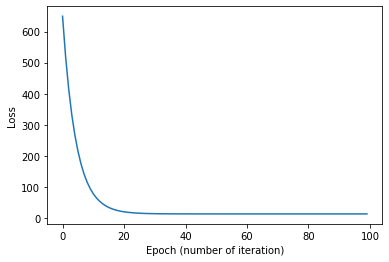

Lowest cost =12.391825276921695
 Cost after 2000 iterations = 12.391825276921695


In [8]:
# Checking out the loss or cost plot
plt.plot(cost)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Loss")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 2000 iterations = " + str(cost[-1]))

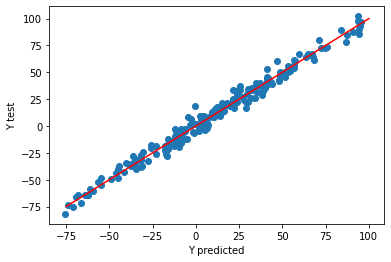

Analysis:
Total mean squared error measures: 13.11105140111318
Optimum mean squared error measures (from model): 12.391825276921695
Differences of predicted and optimum mean squared error measures: 0.7192261241914846


In [9]:
# Evaluate the linear regression model with the estimated weights on the test set
y_predicted = prediction(weigh, X_test) 

# Display Y predicted against Y test
plt.scatter(y_predicted, y_test)

plt.xlabel("Y predicted")
plt.ylabel( "Y test")

# Linear plot
x = np.linspace(-75, 100, 100)
y = x
plt.plot(x, y, 'r')
plt.show()

# Calculate total mean squared error measures
err = loss_fn(y_test, y_predicted)
print("Analysis:")
print("Total mean squared error measures: " + str(err))
# Optional analysis
print("Optimum mean squared error measures (from model): " + str(cost[-1]))
print("Differences of predicted and optimum mean squared error measures: " + str(abs(err - cost[-1])))